In [1]:

#import pickle
#with open('ij_vh_float.pkl','wb') as f:
#    pickle.dump({'ij_v_float':ij_v_float,'ij_h_float':ij_h_float},f)
import pickle
with open('ij_vh_float.pkl','rb') as f:
    slice_dict = pickle.load(f)
ij_v_float = slice_dict['ij_v_float']
ij_h_float = slice_dict['ij_h_float']
import glob
fs=glob.glob('*rand_sel*.nc')
fs=sorted(fs)[:]
print(fs)

# ds_out=xr.Dataset({'total_column_water_vapour':tpw_xr,'total_precipitation':tp_xr,'geopotential':geopotential_xr,'mean_sea_level_pressure':mean_sea_level_pressure_xr,'temperature_2m':temp_2m_xr,'specific_humidity':qv_xr,'total_column_water':total_column_water_xr,'u_10m':u_10m_xr,'v_10m':v_10m_xr,'temperature':temperature_xr})
#fname_out='weatherbench2_hourly_rand_sel_%s.nc'%(str(ds['time'][nstart+itime].data)[:-10])
import numpy as np
import netCDF4 as nc
ij_v_int=np.round(ij_v_float).astype(np.int16)
ij_h_int=np.round(ij_h_float).astype(np.int16)
n_choose=2000
qv_train_L=[]
geopotential_train_L=[]
temperature_train_L=[]
u_10m_train_L=[]
v_10m_train_L=[]
mean_sea_level_pressure_train_L=[]
total_precipitation_train_L=[]
temperature_2m_train_L=[]
boundary_layer_height_train_L=[]

qv_val_L=[]
geopotential_val_L=[]
temperature_val_L=[]
u_10m_val_L=[]
v_10m_val_L=[]
mean_sea_level_pressure_val_L=[]
total_precipitation_val_L=[]
temperature_2m_val_L=[]
boundary_layer_height_val_L=[]

for f in fs:
    with nc.Dataset(f) as fh:
        qv=fh.variables['specific_humidity'][:]
        geopotential=fh.variables['geopotential'][:]
        temperature=fh.variables['temperature'][:]
        u_10m=fh.variables['u_10m'][:]
        v_10m=fh.variables['v_10m'][:]
        mean_sea_level_pressure=fh.variables['mean_sea_level_pressure'][:]
        total_precipitation=fh.variables['total_precipitation'][:]
        temperature_2m=fh.variables['temperature_2m'][:]
        boundary_layer_height=fh.variables['boundary_layer_height'][:]
        ichoice=np.random.choice(len(ij_v_int),2*n_choose)
        for i in ichoice[:n_choose]:
            #print(qv.shape)
            qv_train_L.append(qv[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            geopotential_train_L.append(geopotential[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            temperature_train_L.append(temperature[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            boundary_layer_height_train_L.append(boundary_layer_height[0,ij_v_int[i][0],ij_v_int[i][1]])
            u_10m_train_L.append(u_10m[0,ij_v_int[i][0],ij_v_int[i][1]])
            v_10m_train_L.append(v_10m[0,ij_v_int[i][0],ij_v_int[i][1]])
            mean_sea_level_pressure_train_L.append(mean_sea_level_pressure[0,ij_v_int[i][0],ij_v_int[i][1]])
            total_precipitation_train_L.append(total_precipitation[0,ij_v_int[i][0],ij_v_int[i][1]])
            temperature_2m_train_L.append(temperature_2m[0,ij_v_int[i][0],ij_v_int[i][1]])
        for i in ichoice[n_choose:]:
            qv_val_L.append(qv[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            geopotential_val_L.append(geopotential[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            temperature_val_L.append(temperature[0,:,ij_v_int[i][0],ij_v_int[i][1]])
            u_10m_val_L.append(u_10m[0,ij_v_int[i][0],ij_v_int[i][1]])
            v_10m_val_L.append(v_10m[0,ij_v_int[i][0],ij_v_int[i][1]])
            mean_sea_level_pressure_val_L.append(mean_sea_level_pressure[0,ij_v_int[i][0],ij_v_int[i][1]])
            total_precipitation_val_L.append(total_precipitation[0,ij_v_int[i][0],ij_v_int[i][1]])
            temperature_2m_val_L.append(temperature_2m[0,ij_v_int[i][0],ij_v_int[i][1]])
            boundary_layer_height_val_L.append(boundary_layer_height[0,ij_v_int[i][0],ij_v_int[i][1]])



['weatherbench2_hourly_rand_sel_2018-04-15T11:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-04-16T08:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-04-18T22:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-04-26T11:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-04-26T22:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-04-27T19:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-03T12:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-05T08:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-11T13:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-17T02:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-18T14:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-05-31T00:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-02T00:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-03T22:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-04T06:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-04T08:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-06T02:00:00.nc', 'weatherbench2_hourly_rand_sel_2018-06-08T08:00

In [2]:
qv_train=np.array(qv_train_L)
geopotential_train=np.array(geopotential_train_L)
temperature_train=np.array(temperature_train_L)
u_10m_train=np.array(u_10m_train_L)
v_10m_train=np.array(v_10m_train_L)
mean_sea_level_pressure_train=np.array(mean_sea_level_pressure_train_L)
total_precipitation_train=np.array(total_precipitation_train_L)
temperature_2m_train=np.array(temperature_2m_train_L)
boundary_layer_height_train=np.array(boundary_layer_height_train_L)
import xarray as xr
ds_out=xr.Dataset({'specific_humidity':(('sample','level'),qv_train),'geopotential':(('sample','level'),geopotential_train),'temperature':(('sample','level'),temperature_train),'u_10m':(('sample',),u_10m_train),'v_10m':(('sample',),v_10m_train),'mean_sea_level_pressure':(('sample',),mean_sea_level_pressure_train),'total_precipitation':(('sample',),total_precipitation_train),'temperature_2m':(('sample',),temperature_2m_train),'boundary_layer_height':(('sample',),boundary_layer_height_train)})
comp=dict(zlib=True, complevel=5)
encoding = {var: comp for var in ds_out.data_vars}
fname_out='sounding_prof_training.nc'
ds_out.to_netcdf(fname_out,encoding=encoding)

qv_val=np.array(qv_val_L)
geopotential_val=np.array(geopotential_val_L)
temperature_val=np.array(temperature_val_L)
u_10m_val=np.array(u_10m_val_L)
v_10m_val=np.array(v_10m_val_L)
mean_sea_level_pressure_val=np.array(mean_sea_level_pressure_val_L)
total_precipitation_val=np.array(total_precipitation_val_L)
temperature_2m_val=np.array(temperature_2m_val_L)
boundary_layer_height_val=np.array(boundary_layer_height_val_L)
ds_out=xr.Dataset({'specific_humidity':(('sample','level'),qv_val),'geopotential':(('sample','level'),geopotential_val),'temperature':(('sample','level'),temperature_val),'u_10m':(('sample',),u_10m_val),'v_10m':(('sample',),v_10m_val),'mean_sea_level_pressure':(('sample',),mean_sea_level_pressure_val),'total_precipitation':(('sample',),total_precipitation_val),'temperature_2m':(('sample',),temperature_2m_val),'boundary_layer_height':(('sample',),boundary_layer_height_val)})
comp=dict(zlib=True, complevel=5)
encoding = {var: comp for var in ds_out.data_vars}
fname_out='sounding_prof_val.nc'
ds_out.to_netcdf(fname_out,encoding=encoding)

In [1]:
#ds_out=xr.Dataset({'specific_humidity':(('sample','level'),qv_val),'geopotential':(('sample','level'),geopotential_val),'temperature':(('sample','level'),temperature_val),'u_10m':(('sample',),u_10m_val),'v_10m':(('sample',),v_10m_val),'mean_sea_level_pressure':(('sample',),mean_sea_level_pressure_val),'total_precipitation':(('sample',),total_precipitation_val),'temperature_2m':(('sample',),temperature_2m_val),'boundary_layer_height':(('sample',),boundary_layer_height_val)})
import netCDF4 as nc
with nc.Dataset('sounding_prof_training.nc') as fh:
    qv=fh.variables['specific_humidity'][:]
    geopotential=fh.variables['geopotential'][:]
    temperature=fh.variables['temperature'][:]
    u_10m=fh.variables['u_10m'][:]
    v_10m=fh.variables['v_10m'][:]
    mean_sea_level_pressure=fh.variables['mean_sea_level_pressure'][:]
    total_precipitation=fh.variables['total_precipitation'][:]
    temperature_2m=fh.variables['temperature_2m'][:]
    boundary_layer_height=fh.variables['boundary_layer_height'][:]

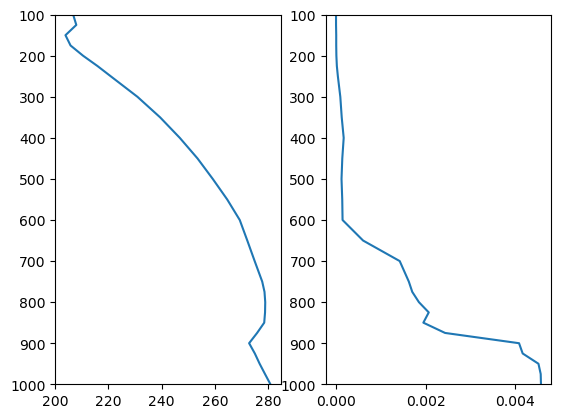

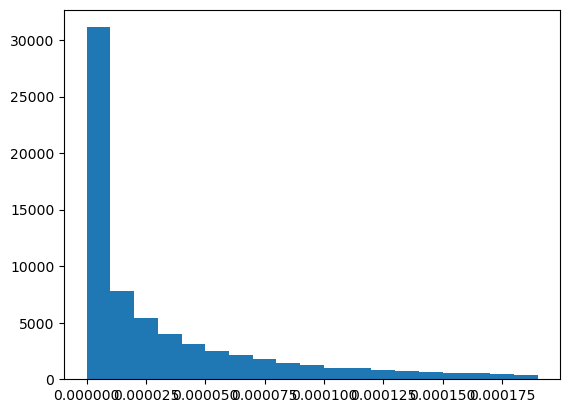

In [2]:
import matplotlib.pyplot as plt
import numpy as np
press=np.array([1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000])
plt.subplot(1,2,1)
plt.plot(temperature[0,:],press)
plt.ylim(1000,100)
plt.subplot(1,2,2)
plt.plot(qv[0,:],press)
plt.ylim(1000,100)
plt.figure()
h1=plt.hist(total_precipitation,bins=np.arange(20)*0.00001)

In [3]:
import lkTables
lkT= lkTables.scattTables()
print(dir(lkT))
import sdsu_tables as sdsu
freq=60.0
temp=273.15
lwc=0.1
nc=800*1e6
sdsu.microp_set()

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): dim_0(289), dim_1(8)
    variables(dimensions): float32 kextR(dim_0, dim_1), float32 salbR(dim_0, dim_1), float32 asymR(dim_0, dim_1), float32 kextS(dim_0, dim_1), float32 salbS(dim_0, dim_1), float32 asymS(dim_0, dim_1), float32 kextG(dim_0, dim_1), float32 salbG(dim_0, dim_1), float32 asymG(dim_0, dim_1)
    groups: 
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'asymBB', 'asymG', 'asymR', 'asymS', 'attKaBB', 'attKaG', 'attKaR', 'attKaS', 'attKuBB', 'attKuG', 'attKuR', 'attKuS', 'dmBB', 'dmg', 'dmr', 'dms', 'fh', 'fhBB', 'fhGMI', 'graupRate', 'gwc', 'kextBB', 'kextG', 'kextR',

In [4]:
flines=open('freqTable','r').readlines()
freqs=[]
p_m='±'
for l in flines:
    lsplit=l.split()[1:]
    #print(lsplit[0],lsplit[1])
    if lsplit[1]==p_m:
        freqs.append(float(lsplit[0])+float(lsplit[2]))
        #freqs.append(float(lsplit[0])-float(lsplit[2]))
    else:
        freqs.append(float(lsplit[0]))

print(freqs)

[50.3, 51.76, 52.8, 53.711, 54.4, 54.94, 55.5, 57.290344, 88.2, 165.5, 190.31, 187.81, 186.31, 185.11, 184.31]


In [4]:
nlyr=29
kext1D=np.zeros(nlyr)
asym1D=np.zeros(nlyr)
salb1D=np.zeros(nlyr)
iprof=0
hL=[0]
lyrtemp=[temperature_2m[iprof]]
fisot=2.7
emis=0.9
ebar=0.9
umu=np.cos(53/180*np.pi)
for k in range(nlyr):
    nk=-1-k
    ireturn=0
    rho=press*100/(287.05*temperature)
    absair,abswv = sdsu.gasabsr98(freq,temperature[iprof,nk],qv[iprof,nk]*rho[nk],press[nk],ireturn)
    hL.append((geopotential[iprof,nk]+geopotential[iprof,nk-1])/2/9.8)
    tavg=(temperature[iprof,nk]+temperature[iprof,nk-1])/2
    lyrtemp.append(tavg)
        
    kext1D[k]=absair+abswv
    asym1D[k]=0
    salb1D[k]=0
    npol=1
    ts=temperature_2m[iprof]
    w=np.sqrt(u_10m[iprof]**2+v_10m[iprof]**2)
    emis,ebar = sdsu.emit(freq,npol,ts,w,umu)
lyrtemp=np.array(lyrtemp)
lyrhgt=np.array(hL)/1e3 # convert to km
ilambert=0
btemp=temperature_2m[iprof]
tb=sdsu.radtran(umu,btemp,lyrtemp,lyrhgt,kext1D,salb1D,asym1D,fisot,emis,ebar,ilambert)
print(tb)

215.1573944091797


In [13]:
print(geopotential.shape)
print(lyrtemp)
print()
print(np.array(hL))

(78000, 37)
[284.74612 279.81293 277.7845  275.87534 273.9018  274.3277  277.1643
 278.65637 278.8459  278.7443  278.1787  276.33115 273.52805 270.72626
 266.955   261.88724 256.30426 250.11215 243.09155 235.13797 225.86572
 218.35388 213.15988 208.10385 204.79425 205.87543 207.32346 208.51752
 212.81525 216.63596]

[    0.           417.67202759   627.68218994   841.68884277
  1059.92480469  1283.10241699  1514.1895752   1754.24462891
  2002.03564453  2257.66699219  2521.19360352  2934.45239258
  3510.97485352  4125.52099609  4783.37109375  5489.26660156
  6250.39453125  7077.47216797  7984.40820312  8990.9296875
 10124.80078125 11064.33203125 11768.87597656 12543.08886719
 13411.65136719 14420.3046875  15646.71191406 17415.66992188
 19552.54492188 22217.23242188]


In [ ]:
from numba import jit
#@jit(nopython=True) 
def calculate_tb_prof(iprof,incAngle,freqs,temperature_2m,u_10m,v_10m,qv,geopotential,temperature,press):
    fisot=2.7 # background radiation in K
    umu=np.cos(incAngle/180*np.pi)
    tb_all_freq=[]   
    nlyr=29  
    kext1D=np.zeros(nlyr)
    asym1D=np.zeros(nlyr)
    salb1D=np.zeros(nlyr)
   
    for ifreq,freq in enumerate(freqs):        
        hL=[0]
        lyrtemp=[temperature_2m[iprof]]
        fisot=2.7
        for k in range(nlyr):
            nk=-1-k
            ireturn=0
            rho=press*100/(287.05*temperature)
            absair,abswv = sdsu.gasabsr98(freq,temperature[iprof,nk],qv[iprof,nk]*rho[nk],press[nk],ireturn)
            hL.append((geopotential[iprof,nk]+geopotential[iprof,nk-1])/2/9.8)
            tavg=(temperature[iprof,nk]+temperature[iprof,nk-1])/2
            lyrtemp.append(tavg)
        
            kext1D[k]=absair+abswv
            asym1D[k]=0
            salb1D[k]=0
        npol=1
        ts=temperature_2m[iprof]
        w=np.sqrt(u_10m[iprof]**2+v_10m[iprof]**2)
        emis,ebar = sdsu.emit(freq,npol,ts,w,umu)
        lyrtemp=np.array(lyrtemp)
        lyrhgt=np.array(hL)/1e3 # convert to km
        ilambert=0
        btemp=temperature_2m[iprof]
        tb=sdsu.radtran(umu,btemp,lyrtemp,lyrhgt,kext1D,salb1D,asym1D,fisot,emis,ebar,ilambert)
        tb_all_freq.append(tb)
    return tb_all_freq

iprof=0
tb_all_freq=calculate_tb_prof(iprof,53,freqs,temperature_2m.data,u_10m.data,v_10m.data,qv.data,geopotential.data,temperature.data,press)
   
    

In [ ]:
incAngle=53.0
iprof=1

np.random.seed(1969)
ichoice=np.random.choice(temperature_2m.shape[0],15000)

import tqdm
pbl_heightL=[]
tb_all_freq_53_L=[]
incAngle=53.0
for iprof in tqdm.tqdm(ichoice):
    tb_all_freq = sdsu.calculate_tb_prof(iprof+1,incAngle,freqs,temperature_2m,u_10m,v_10m,qv,geopotential,temperature,press)
    tb_all_freq_53_L.append(tb_all_freq)
    pbl_heightL.append(boundary_layer_height[iprof])

incAngle=20.0
tb_all_freq_20_L=[]
for iprof in tqdm.tqdm(ichoice):
    tb_all_freq = sdsu.calculate_tb_prof(iprof+1,incAngle,freqs,temperature_2m,u_10m,v_10m,qv,geopotential,temperature,press)
    tb_all_freq_20_L.append(tb_all_freq)
    #pbl_heightL.append(boundary_layer_height[iprof])
#print(tb_all_freq)

100%|██████████| 15000/15000 [03:59<00:00, 62.57it/s]


In [66]:
incAngle=10.0
tb_all_freq_10_L=[]
for iprof in tqdm.tqdm(ichoice):
    tb_all_freq = sdsu.calculate_tb_prof(iprof+1,incAngle,freqs,temperature_2m,u_10m,v_10m,qv,geopotential,temperature,press)
    tb_all_freq_10_L.append(tb_all_freq)

incAngle=40.0
tb_all_freq_40_L=[]
for iprof in tqdm.tqdm(ichoice):
    tb_all_freq = sdsu.calculate_tb_prof(iprof+1,incAngle,freqs,temperature_2m,u_10m,v_10m,qv,geopotential,temperature,press)
    tb_all_freq_40_L.append(tb_all_freq)
    #pbl_heightL.append(boundary_layer_height[iprof])
    

100%|██████████| 15000/15000 [04:03<00:00, 61.66it/s]


In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
tb_all_freq_53_L=np.array(tb_all_freq_53_L)
tb_all_freq_20_L=np.array(tb_all_freq_20_L)
tb_all_freq_40_L=np.array(tb_all_freq_40_L)
tb_all_freq_10_L=np.array(tb_all_freq_10_L)
tb_all_freq_0_L=np.array(tb_all_freq_0_L)
tb_all_freq_L=np.concatenate((tb_all_freq_53_L,tb_all_freq_40_L,tb_all_freq_20_L,tb_all_freq_10_L,tb_all_freq_0_L),axis=1)
knnReg=KNeighborsRegressor(n_neighbors=10)
hgbr=HistGradientBoostingRegressor()
X=np.array(tb_all_freq_L)
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)
hgbr.fit(X[:10000,:],pbl_heightL[:10000])
y=np.array(pbl_heightL)
knnReg.fit(X[:10000,:],y[:10000])
y_pred=knnReg.predict(X[10000:,:])
y_pred_hgbr=hgbr.predict(X[10000:,:])
print(np.corrcoef(y_pred,y[10000:]))
print(np.corrcoef(y_pred_hgbr,y[10000:]))

[[1.         0.62619302]
 [0.62619302 1.        ]]
[[1.         0.79721926]
 [0.79721926 1.        ]]


6.756756756756757
0.606997048386494


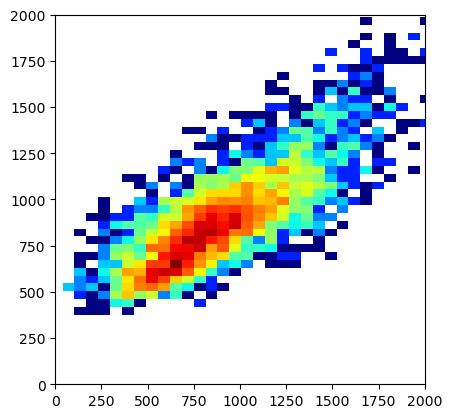

In [69]:
from matplotlib.colors import LogNorm
ax=plt.subplot(1,1,1)
h2=plt.hist2d(y[10000:],y_pred_hgbr,bins=40,cmap='jet',norm=LogNorm())
ax.set_aspect('equal')
plt.xlim(0,2000)
plt.ylim(0,2000)
print(5/0.74)
def norm_mse(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))/y_true.std()

print(norm_mse(y[10000:],y_pred_hgbr))